# Clustering Mall Customers

Last updated: September 2020

## How is this useful?



## About the Dataset



In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# read in the dataset, print shape and column titles
dataset = pd.read_csv('Mall_Customers.csv')
print("Dataset shape: ", dataset.shape)
print(dataset.head())

Dataset shape:  (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


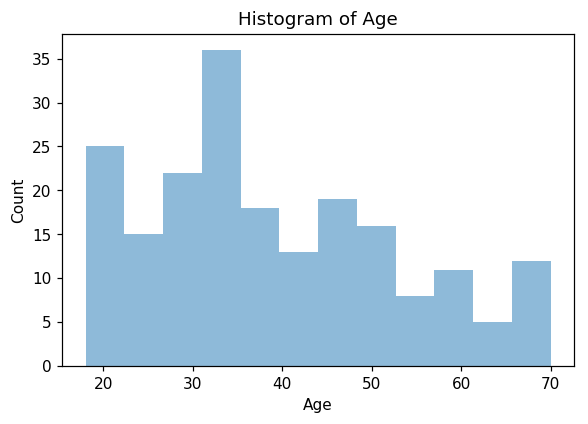

In [49]:
%matplotlib inline
x = dataset.iloc[:,2].values

plt.figure(dpi=110)
plt.hist(x,12,alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

In [35]:
x = dataset.iloc[:,3].values

plt.figure(dpi=110)
plt.hist(x,12,alpha=0.5)
plt.xlabel('Annual Income (1000s)')
plt.ylabel('Count')
plt.title('Histogram of Annual Income')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [37]:
X = dataset.iloc[:,[2,4]].values
Y = dataset.iloc[:,[3,4]].values

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
fig.suptitle('Data Visualisation')
ax1.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', alpha=0.5)
ax1.set_title('Spending Score vs Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score')

ax2.scatter(Y[:, 0], Y[:, 1], s=50, cmap='viridis', alpha=0.5)
ax2.set_title('Spending Score vs Annual Income')
ax2.set_xlabel('Annual Income (1000s)')
ax2.set_ylabel('Spending Score')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
X = dataset.iloc[:,[2,4]].values

# calculate optimal number of clusters
from sklearn.cluster import KMeans
wcss = []   # create empty list to hold WCSS values for each K-Means fit

# loop through 10 values of K to find the optimal value, calculate WCSS on each pass
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the WCSS calculation
    
# visualise the plot of WCSS - optimal K is found to be 5
plt.figure() 
plt.plot(range(1,11), wcss)
plt.title('WCSS Minimisation - Spending Score vs Age')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/Users/Ricardo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
# apply k means to mall dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(4), cmap='viridis', s=200, alpha=1.0)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1.0)
plt.title('K-Means Clustering of Spending Score vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

/Users/Ricardo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
X = dataset.iloc[:,[3,4]].values

# calculate optimal number of clusters
from sklearn.cluster import KMeans
wcss = []   # create empty list to hold WCSS values for each K-Means fit

# loop through 10 values of K to find the optimal value, calculate WCSS on each pass
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the WCSS calculation
    
# visualise the plot of WCSS - optimal K is found to be 5
plt.figure() 
plt.plot(range(1,11), wcss)
plt.title('WCSS Minimisation - Spending Score vs Annual Income')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/Users/Ricardo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [42]:
# apply k means to mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(5), cmap='viridis', s=200, alpha=1.0)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1.0)
plt.title('K-Means Clustering of Spending Score vs Income')
plt.xlabel('Annual Income (1000s)')
plt.ylabel('Spending Score')
plt.show()

/Users/Ricardo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
X = dataset.iloc[:,[2,3,4]].values

# calculate optimal number of clusters
from sklearn.cluster import KMeans
wcss = []   # create empty list to hold WCSS values for each K-Means fit

# loop through 10 values of K to find the optimal value, calculate WCSS on each pass
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ is the WCSS calculation
    
# visualise the plot of WCSS - optimal K is found to be 5
plt.figure() 
plt.plot(range(1,11), wcss)
plt.title('WCSS Minimisation - Spending Score vs Annual Income')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/Users/Ricardo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# apply k means to mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state=0)
y_kmeans = kmeans.fit_predict(X)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='viridis', alpha=0.3)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c=np.arange(5), cmap='viridis', s=200, alpha=1.0)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=50, alpha=1.0)
ax.set_title('K-Means Clustering of Spending Score vs Income & Age')
ax.set_ylabel('Annual Income (1000s)')
ax.set_xlabel('Age')
ax.set_zlabel('Spending Score')
plt.show()

/Users/Ricardo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …